# Introductory junk on root finding 
Root finding is the generalized name of funciton minimization, just rather than finding where a function is equal to zero, we do a little extra work to use it to find where a function is equal to _something_. Most generally, a minimization problem is the computational task of finding the value of $x$ which satisfies 

$$
\begin{equation}
f(x) = 0
\end{equation}
$$

Well, to turn this into a _root finding_ problem, we are now looking for

$$
\begin{equation}
f(x) = c
\end{equation}
$$

Where, as in all minimization problems you'll find the phrase "constants don't matter" thrown around, so, to find the value of $x$ to see where our funciton evaluates to $c$ we simply have the problem

$$
\begin{equation}
f(x) - c = 0
\end{equation}
$$

our classic minimization problem

## Newton-Raphson 

The method we will focus on here is the Newton-Raphson method before moving on to more general techniques, as I find it's a good introduction to the general idea of how minimization algorithms come to be. (If this was a craft beer, this is a discussion of "mouth-feel" for minimization routines). The idea of the Newton Raphson method is to use information about the derivative to interpolate our way to zero. 

### Derivation 

As with most derivations, our story begins with the mathematical equivalent of "adding more layers" to our neural network - we expand our function $f(x)$ in a Taylor Series about some small value. That is, for a small value, say $\epsilon$ we have

$$
\begin{equation}
f(x + \epsilon) \approx f(x) + \epsilon f^\prime(x) + \epsilon^2 f^{\prime \prime}(x) + ...
\end{equation}
$$

Where, as we're assuming $\epsilon$ is sufficently small (or we're close enough to our solution) we neglect any terms beyond those linear in $\epsilon$. That is, we have 

$$
\begin{aligned}
f(x +\epsilon) & \approx f(x) + \epsilon f^\prime(x) = 0 \\
\implies & \epsilon = -\frac{f(x)}{f^\prime(x)}
\end{aligned}
$$

Where we can define our update formulas to be our previous point, minus the above equation. Or

$$
\begin{aligned}
x_{i+1} = & x_i -\frac{f(x_i)}{f^\prime(x_i)} \\
\epsilon_{i+1} = & \epsilon_i  -\frac{f(x_i)}{f^\prime(x_i)}
\end{aligned}
$$

Where we would repeat this process until subsequent values for $x_i$ no longer change much.  

One caveat to the above is the iterative nature of finding $x_n$, how do we get this algorithm going? The answer here is that we have to provide an initial guess at our solution. And with any luck, we should know approximately where our solution is so that we can guess at it, and come to a solution rather quickly. As we explore this notebook, we will see rather quickly that the inital guess at our solution matters a lot when it comes to finding solutions -- if we can find them at all!

# Challenge 1

Implement your own Newton Raphson method below. I have set up a function for you to fill in with your own implemenation of the Newton Raphson method. I have also provided a completed function in the `scripts` folder of this directory if you don't want to write it yourself, but I do strongly recommend that you try!

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.optimize import brentq
%matplotlib inline

def function(x):
    return x**2

def fprime(x):
    return 2 * x

def MyNR(f, fprime, x0, max_iter = 100, prec = 1e-6, verbose = False):
    '''
    Your Implementation of the Newton Raphson method. The variables are as follows:
    f --> a Python function which takes a point x, and returns that function as evaluated
          at that point x
    fprime --> the derivative of your function f, which takes a point x and returns a the value 
               of the derivative at x
    x0 --> the inital guess at your solution
    max_iter --> How many times you want to try to find your solution
    prec --> the precision of your calculation ie. how close to zero is our soltion?
    verbose --> Do we want to print convergence messages
    '''
    
    # So we can plot our solutions path
    x = [x0]
    x_val = x0
    
    for i in range(max_iter):
        
        funciton_value = 1# YOUR CODE HERE
        derivative_value = 1#YOUR CODE HERE
        epsilon = 1#YOUR CODE HERE
        new_x =1 # YOUR CODE HERE
        
        x.append(new_x)
        
        if abs(epsilon) < prec:
            return x_val, x
    if verbose:
        print(f"This calculation did not converge after {max_iter} iterations")
    
    return x_val, x

# How Does It Find Solutions

Let's take a look at how well we find solutions using Newton Raphson. Let's start with a nice easy case of trying to find where

$$
x^2 = 0
$$

This is a nice friendly equation with only one minima, let's see how well we find zero.

## Challenge 2

1. Try adding different values for `x0`, does your path to solution change? 
2. Use your own function `MyNR`, do you get the same results?

Notice how many iterations it takes before it converges depending on your initial guess

3.0517578125e-05


(-0.6, 0.6)

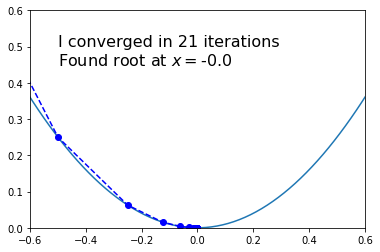

In [6]:
import sys
sys.path.append('scripts/')
import fractalfuncs as FF

def func(x):
    return np.power(x,2)

def deriv(x):
    return 2*np.array(x)
        
    
x= np.arange(-1,1,1/100)

plt.plot(x, func(x))

x0 = -8

# Replace FF.NewtonRaphson with your own implementation if you desire
min_ , points = FF.NewtonRaphson(func, deriv, x0=x0,prec= 1e-5)  

plt.plot(points, func(points), linestyle='--', marker='o', color='b')
plt.text(-.5, 0.5, f"I converged in {len(points)} iterations", size = 16)
plt.text(-.5, 0.45, f"Found root at $x=${round(min_,2)}", size = 16)
plt.ylim([0,0.6])
plt.xlim([-.6,.6])

So that was pretty easy, but what about if we use a "spicer" function than a simple quadratic? Lets try something that we couldn't invert easily by hand, something like say

$$
f(x) = -10 \exp\left(-x^2\right)-5 \exp\left( \left[x-5\right]^2\right) +x = 0
$$

where in fact, inverting this equation and solving for where x is equal to zero by hand is quite impossible! But let's plot that function below and see what it looks like

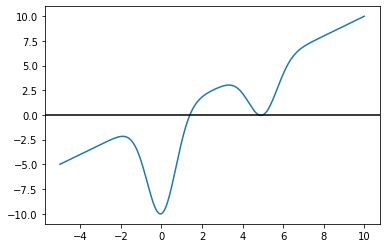

In [16]:
def double_min(x):
    return -10 * np.exp(-x**2) - 5*np.exp(-(x - 5)**2)  +x
def double_min_deriv(x):
    return 20 * x * np.exp(-x**2) + 10 * (x-5) * np.exp(-(x-5)**2) 

x= np.arange(-5,10,1/100)
plt.plot(x, double_min(x))
plt.axhline(0, c = 'black')

Ah ha! so we see that we have two roots, one at about 1.5, and another at about 4.5. Let's see how well our root finding technique can find those roots below

## Challenge 3

Change your initial guess `x0`, can you find values that do not find a solution? Note that finding the root at approximately 1.5 is much more difficult!

3.929620428007494


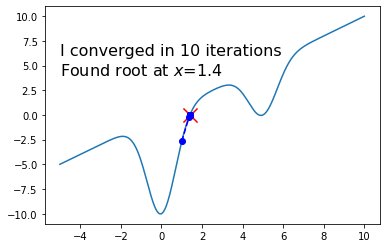

In [21]:
# Replace FF.NewtonRaphson with your own implementation if you desire
def double_min(x):
    return -10 * np.exp(-x**2) - 5*np.exp(-(x - 5)**2)  +x
def double_min_deriv(x):
    return 20 * x * np.exp(-x**2) + 10 * (x-5) * np.exp(-(x-5)**2) 

x0 = 1
min_ , points = FF.NewtonRaphson(double_min, double_min_deriv, x0=x0, prec= 1e-5)  

plt.plot(x, double_min(x))
plt.text(-5, 6.0, f"I converged in {len(points)} iterations", size = 16)
plt.text(-5, 4.0, f"Found root at $x$={round(min_,2)}", size = 16)

plt.plot(np.array(points), double_min(np.array(points)), linestyle='--', marker='o', color='b')
last = points[-1]

plt.scatter(last,double_min(last) , c = 'r', marker = "x", s=200)


Where on a function like the one above, it probably didn't take you too long to find an intial guess at a solution which did not. This is not your fault. In fact, this is something that just happens when it comes to root finding! Because of this there are a few pieces of advice when it comes to root finding

1. Always plot your function and try to have an idea approximately where your solution lies so you can make an intelligent initial guess
2. If your solution doesn't converge, odds are your initial guess was bad!


You may be wondering how this can be used to generate fractals, but we will start abusing the convergence properties of the Newton Raphson (and other formulas) to find areas where our function converges, and areas where it does not. 

## More Things

Try with other functions! If you're not sure on how to take the derivative of a function, wolframalpha may help, alternatively you can do it numerically with a provided function like so 



```python
# Only if you haven't imported it already
import sys
sys.path.append('scripts/')
import fractalfuncs as FF
def myfunction(z):
    return z**2 # for example

def myderivative(z):
    return FF.nderiv(myfunction, z)
```